# Computational Methods in Economics

## Lecture 5 - Numerical Optimization

In [1]:
# Author: Alex Schmitt (schmitt@ifo.de)

import datetime
print('Last update: ' + str(datetime.datetime.today()))

Last update: 2017-11-16 10:51:54.732059


### Preliminaries

#### Import Modules

In [2]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn

import scipy.optimize

# import sys
from importlib import reload

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'introduction'></a>

## Introduction

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'golden'></a>

## Golden Search

Similar to root finding, for performing numerical optimization we have both derivative-free methods as well as algorithms that either rely on analytical derivatives provided by the user or approximate the derivatives numerically. First, we look at an important method for maximizing a *univariate* function without using derivates, namely *golden search*.

Conceptually, golden search is similar to bisection: we bracket the minimum $x^*$ by the interval $[a, b]$ and then sequentially reduce the length of the interval. One important difference to bisection is that we need to evaluate the function at *two* points inside the bracket, rather than one as in the case of bisection. This is illustrated by the following example:  

In [ ]:
## cp. figure in class
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#
#

The obvious question is then how to choose the *search points* $c$ and $d$ inside the bracket. **Golden (section) search** prescribes the following rule:
\begin{align}
    c &= a + r (b - a) \\
    d &= b - r (b - a)
\end{align}
where
\begin{equation}
    r = \frac{3 - \sqrt{5}}{2} \approx 0.382...
\end{equation}    

This satisfies two criteria:

- The new interval always has the same length, independent whether the upper or lower bound is replaced:

\begin{equation}
       b - c = d - a = (1 - r)(b - a) 
\end{equation}   

- For every refinement after the first, one of the search points equals the search point from the previous refinement that was not used as a new bound; in other words,

    1. if $f(c) < f(d)$, the new interval is $[a, d]$; for the next refinement, $d' = c$
    2. if $f(c) > f(d)$, the new interval is $[c, b]$; for the next refinement, $c' = d$

This has the advantage that only one function evaluation is performed per iteration; e.g. in the first case, we need to evaluate $f(c')$, but we already have evaluated $f(d') = f(c)$ for the previous refinement. 

In Python, golden section search for minimizing a univariate function is implemented in **scipy.optimize.golden**. Below, we apply it on the function $f(x) = - \exp(-x) \sin(x)$:

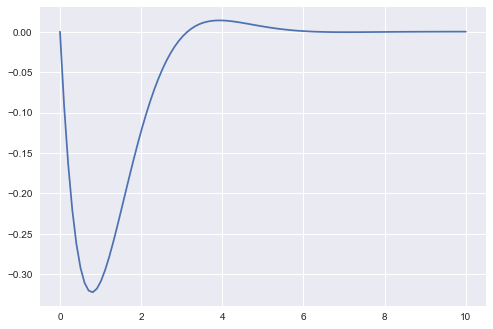

In [5]:
f = lambda x: -np.exp(-x) * np.sin(x)
x = np.linspace(0, 10, 100)
plt.plot(x, f(x))

In [8]:
scipy.optimize.golden(f, brack = (0, 2))

0.7853981651501754

We will not use golden search very often, for the simple reason that we usually optimize over functions with more than one variable. However, golden search is useful in the case of univariate functions with derivatives that are irregular or computationally costly to evaluate.

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'Nelder-Mead'></a>

## Nelder-Mead (Simplex)

Compare http://www.benfrederickson.com/numerical-optimization/ for a visualization.

#### Example: "Banana" function

In [14]:
def banana(x):
    return 100 * (x[1] - x[0]**2)**2 + (1 - x[0])**2

In [16]:
scipy.optimize.minimize(banana, [0, 1], method = 'Nelder-Mead')

 final_simplex: (array([[ 1.00000205,  1.00000565],
       [ 0.99996743,  0.99993257],
       [ 0.99996276,  0.99992823]]), array([  2.42887199e-10,   1.58293615e-09,   2.11970761e-09]))
           fun: 2.4288719914788363e-10
       message: 'Optimization terminated successfully.'
          nfev: 191
           nit: 101
        status: 0
       success: True
             x: array([ 1.00000205,  1.00000565])

Similar to golden search in the univariate case, use the Nelder-Mead algorithm only in cases where a single optimization is performed and evaluating the function and its derivatives is costly. Nelder-Mead is slow and unreliable, in particular for problems with more than two dimensions. In those cases, we are better off with using a variant of the Newton-Raphson method.

--------------------------------------------------------------------------------------------------------------------------------
<a id = 'Newton'></a>

## Newton-Raphson